Choose either

    Modelling the time series with ARIMA, or
    Modelling the time series with linear regression

Dataset: Avocado Prices

    choose between conventional or organic type
    choose one region only


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_avocado = pd.read_csv('avocado.csv')
df_avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df_avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df_avocado['Date'] = pd.to_datetime(df_avocado['Date'], format='%Y-%m-%d')

In [5]:
df_avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [6]:
df_avocado_used = df_avocado[(df_avocado['region'] == 'California') & (df_avocado['type'] == 'organic')]
df_avocado_used.drop('Unnamed: 0',axis=1, inplace=True)
df_avocado_used

C:\Python\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9438,2015-12-27,1.45,98576.63,14306.68,50893.97,0.00,33375.98,29507.45,3868.53,0.0,organic,2015,California
9439,2015-12-20,1.35,99793.55,12746.47,48195.95,1.52,38849.61,25535.80,13313.81,0.0,organic,2015,California
9440,2015-12-13,1.39,98605.40,13609.24,46518.56,3.05,38474.55,24359.79,14114.76,0.0,organic,2015,California
9441,2015-12-06,1.48,91211.53,17839.96,47527.65,1.53,25842.39,25661.06,181.33,0.0,organic,2015,California
9442,2015-11-29,1.75,83415.54,13195.19,48229.29,0.00,21991.06,21671.70,319.36,0.0,organic,2015,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17680,2018-02-04,1.56,188212.98,38078.53,60551.97,0.00,89582.48,89527.66,54.82,0.0,organic,2018,California
17681,2018-01-28,1.87,170998.81,30070.62,58357.89,0.00,82570.30,82563.11,7.19,0.0,organic,2018,California
17682,2018-01-21,1.69,181974.98,34411.37,64513.67,0.00,83049.94,83022.84,27.10,0.0,organic,2018,California
17683,2018-01-14,1.61,216681.04,52253.40,95353.95,0.00,69073.69,69054.51,19.18,0.0,organic,2018,California


In [7]:
df_avocado_used.sort_values('Date',ascending=True,inplace=True)

<ipython-input-7-ad5b08b32b43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avocado_used.sort_values('Date',ascending=True,inplace=True)


In [8]:
df_avocado_used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 9489 to 17673
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
 2   Total Volume  169 non-null    float64       
 3   4046          169 non-null    float64       
 4   4225          169 non-null    float64       
 5   4770          169 non-null    float64       
 6   Total Bags    169 non-null    float64       
 7   Small Bags    169 non-null    float64       
 8   Large Bags    169 non-null    float64       
 9   XLarge Bags   169 non-null    float64       
 10  type          169 non-null    object        
 11  year          169 non-null    int64         
 12  region        169 non-null    object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 18.5+ KB


In [9]:
df_avocado_used_ix = df_avocado_used.copy()
df_avocado_used_ix = df_avocado_used.set_index('Date')
df_avocado_used_ix

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.0,organic,2015,California
2015-01-11,1.10,158110.68,123712.51,25975.27,1.47,8421.43,8421.43,0.00,0.0,organic,2015,California
2015-01-18,1.24,195207.60,123138.29,58616.16,0.00,13453.15,13453.15,0.00,0.0,organic,2015,California
2015-01-25,1.30,121698.02,80952.24,28216.13,0.00,12529.65,12529.65,0.00,0.0,organic,2015,California
2015-02-01,1.11,196031.90,142332.45,41999.51,2.92,11697.02,11697.02,0.00,0.0,organic,2015,California
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.82,179041.72,28991.22,83730.03,0.00,66320.47,66273.89,46.58,0.0,organic,2018,California
2018-03-04,1.57,239135.67,34245.39,67952.25,0.00,136938.03,136877.43,60.60,0.0,organic,2018,California
2018-03-11,1.58,236822.98,32765.76,83573.00,0.00,120484.22,120465.39,18.83,0.0,organic,2018,California


## Check Time Series Stationarity

In [10]:
df_avocado_used_ix

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.0,organic,2015,California
2015-01-11,1.10,158110.68,123712.51,25975.27,1.47,8421.43,8421.43,0.00,0.0,organic,2015,California
2015-01-18,1.24,195207.60,123138.29,58616.16,0.00,13453.15,13453.15,0.00,0.0,organic,2015,California
2015-01-25,1.30,121698.02,80952.24,28216.13,0.00,12529.65,12529.65,0.00,0.0,organic,2015,California
2015-02-01,1.11,196031.90,142332.45,41999.51,2.92,11697.02,11697.02,0.00,0.0,organic,2015,California
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.82,179041.72,28991.22,83730.03,0.00,66320.47,66273.89,46.58,0.0,organic,2018,California
2018-03-04,1.57,239135.67,34245.39,67952.25,0.00,136938.03,136877.43,60.60,0.0,organic,2018,California
2018-03-11,1.58,236822.98,32765.76,83573.00,0.00,120484.22,120465.39,18.83,0.0,organic,2018,California


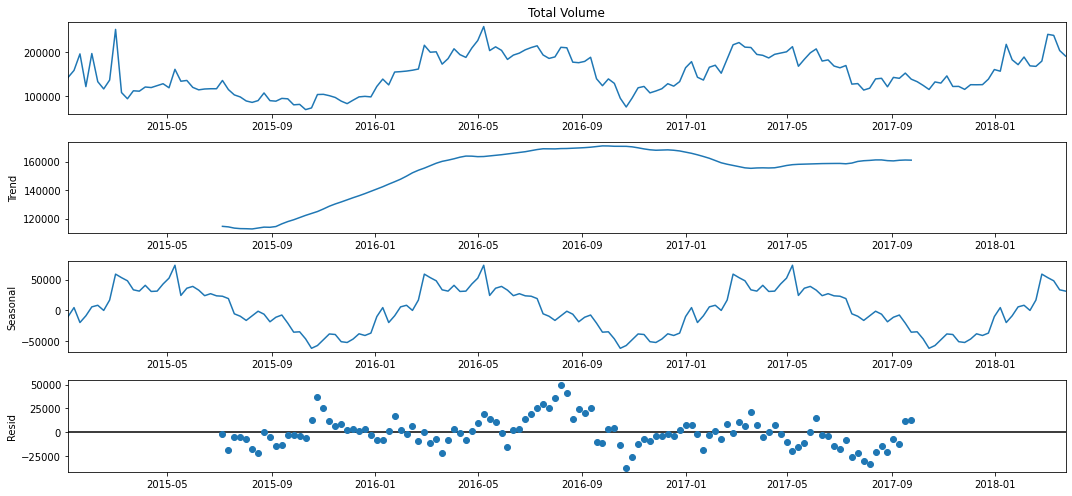

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import rcParams

rcParams['figure.figsize'] = (15,7)
decomposed = seasonal_decompose(df_avocado_used_ix['Total Volume'])
decomposed.plot();

## Statistical Test for Checking Stationarity

Augmented Dickey-Fuller Test (ADF Test)

H
0
 : The series has a unit root (non-stationary)

H
1
 : The series doesn't have a unit root (stationary)

In [12]:
from statsmodels.tsa.stattools import adfuller

test = adfuller(df_avocado_used_ix['Total Volume'])
output = pd.Series(
    test[:4],
    index=['Test statistic', 'p-value', '# of lags', '# of observations']
)

output

Test statistic        -2.944678
p-value                0.040394
# of lags             10.000000
# of observations    158.000000
dtype: float64

In [13]:
for key, value in test[4].items():
    output['Critical Value ({})'.format(key)] = value
output

Test statistic           -2.944678
p-value                   0.040394
# of lags                10.000000
# of observations       158.000000
Critical Value (1%)      -3.472431
Critical Value (5%)      -2.880013
Critical Value (10%)     -2.576619
dtype: float64

In [14]:
alpha = 0.05

if output['p-value'] <= alpha:
    print('Reject null hypothesis: the series is stationary')
else:
    print('Failed to reject null hypothesis: the series is not stationary')

Reject null hypothesis: the series is stationary


KPSS

H
0
 : The series is stationary

H
1
 : The series has a unit root (non-stationary)

In [15]:
from statsmodels.tsa.stattools import kpss 

test = kpss(df_avocado_used_ix['Total Volume'])
output = pd.Series(
    test[:3],
    index=['Test statistic', 'p-value', '# of lags']
)

output

C:\Python\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Python\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Test statistic     0.265528
p-value            0.100000
# of lags         14.000000
dtype: float64

In [16]:
for key, value in test[3].items():
    output['Critical Value ({})'.format(key)] = value
output

Test statistic            0.265528
p-value                   0.100000
# of lags                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

In [17]:
alpha = 0.05

if output['p-value'] <= alpha:
    print('Reject null hypothesis: the series is stationary')
else:
    print('Failed to reject null hypothesis: the series is not stationary')

Failed to reject null hypothesis: the series is not stationary


## Differencing

In [18]:
df_avocado_used['Total Volume lag_1'] = df_avocado_used['Total Volume'].shift(1)
df_avocado_used['Total Volume lag_2'] = df_avocado_used['Total Volume'].shift(2)
df_avocado_used['Total Volume diff_1'] = df_avocado_used['Total Volume'] - df_avocado_used['Total Volume lag_1']
# df_shampoo['Sales_diff_2'] = df_shampoo['Sales'] - df_shampoo['Sales_lag_2']
df_avocado_used['Total Volume diff_2'] = df_avocado_used['Total Volume diff_1'] - df_avocado_used['Total Volume diff_1'].shift(1)
df_avocado_used['Total Volume diff_2_alt'] = df_avocado_used['Total Volume'] - (2 * df_avocado_used['Total Volume lag_1']) + df_avocado_used['Total Volume lag_2']
df_avocado_used

<ipython-input-18-5763766a57a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avocado_used['Total Volume lag_1'] = df_avocado_used['Total Volume'].shift(1)
<ipython-input-18-5763766a57a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avocado_used['Total Volume lag_2'] = df_avocado_used['Total Volume'].shift(2)
<ipython-input-18-5763766a57a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Volume lag_1,Total Volume lag_2,Total Volume diff_1,Total Volume diff_2,Total Volume diff_2_alt
9489,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.0,organic,2015,California,NaN,NaN,NaN,NaN,NaN
9488,2015-01-11,1.10,158110.68,123712.51,25975.27,1.47,8421.43,8421.43,0.00,0.0,organic,2015,California,142349.77,NaN,15760.91,NaN,NaN
9487,2015-01-18,1.24,195207.60,123138.29,58616.16,0.00,13453.15,13453.15,0.00,0.0,organic,2015,California,158110.68,142349.77,37096.92,21336.01,21336.01
9486,2015-01-25,1.30,121698.02,80952.24,28216.13,0.00,12529.65,12529.65,0.00,0.0,organic,2015,California,195207.60,158110.68,-73509.58,-110606.50,-110606.50
9485,2015-02-01,1.11,196031.90,142332.45,41999.51,2.92,11697.02,11697.02,0.00,0.0,organic,2015,California,121698.02,195207.60,74333.88,147843.46,147843.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17677,2018-02-25,1.82,179041.72,28991.22,83730.03,0.00,66320.47,66273.89,46.58,0.0,organic,2018,California,167193.75,168311.26,11847.97,12965.48,12965.48
17676,2018-03-04,1.57,239135.67,34245.39,67952.25,0.00,136938.03,136877.43,60.60,0.0,organic,2018,California,179041.72,167193.75,60093.95,48245.98,48245.98
17675,2018-03-11,1.58,236822.98,32765.76,83573.00,0.00,120484.22,120465.39,18.83,0.0,organic,2018,California,239135.67,179041.72,-2312.69,-62406.64,-62406.64
17674,2018-03-18,1.75,202790.74,29398.11,70514.05,8.08,102870.50,102717.50,153.00,0.0,organic,2018,California,236822.98,239135.67,-34032.24,-31719.55,-31719.55


<AxesSubplot:xlabel='Date', ylabel='Total Volume diff_1'>

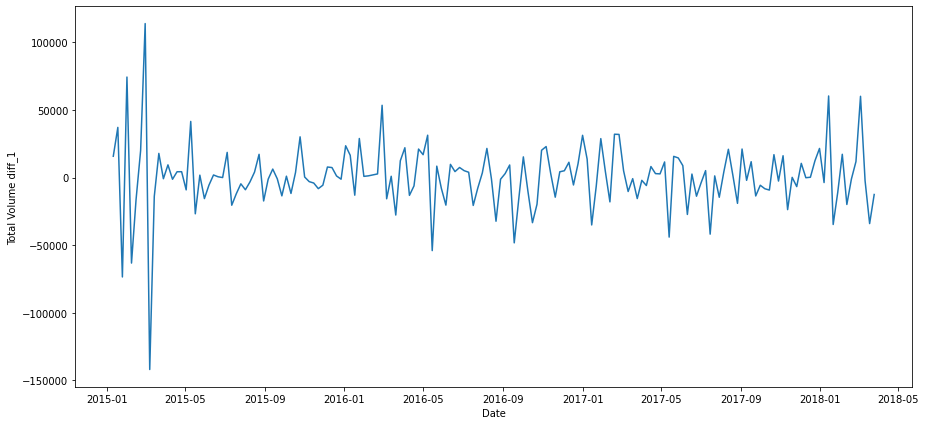

In [19]:
sns.lineplot(x='Date', y='Total Volume diff_1', data=df_avocado_used)

In [20]:
test = adfuller(df_avocado_used['Total Volume diff_1'].dropna())
output = pd.Series(
    test[:4],
    index=['Test statistic', 'p-value', '# of lags', '# of observations']
)

output

Test statistic      -1.094269e+01
p-value              9.210571e-20
# of lags            2.000000e+00
# of observations    1.650000e+02
dtype: float64

In [21]:
alpha = 0.05

if output['p-value'] <= alpha:
    print('Reject null hypothesis: the series is stationary')
else:
    print('Failed to reject null hypothesis: the series is not stationary')

Reject null hypothesis: the series is stationary


## ACF-PACF Plot

C:\Python\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


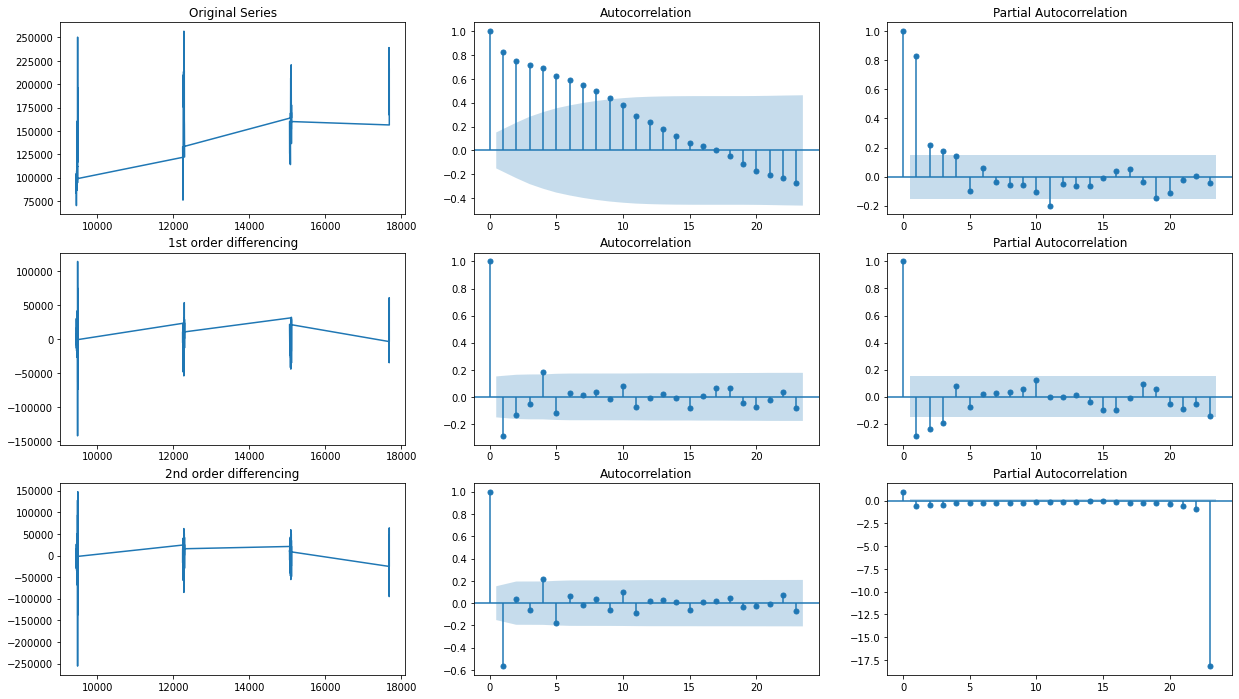

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(3,3,figsize=(21,12))
# original
ax[0,0].plot(df_avocado_used['Total Volume'])
ax[0,0].set_title('Original Series')
plot_acf(df_avocado_used['Total Volume'], ax=ax[0,1])
plot_pacf(df_avocado_used['Total Volume'], ax=ax[0,2])

# 1st differencing
ax[1,0].plot(df_avocado_used['Total Volume diff_1'])
ax[1,0].set_title('1st order differencing')
plot_acf(df_avocado_used['Total Volume diff_1'].dropna(), ax=ax[1,1])
plot_pacf(df_avocado_used['Total Volume diff_1'].dropna(), ax=ax[1,2])

# 2nd differencing
ax[2,0].plot(df_avocado_used['Total Volume diff_2'])
ax[2,0].set_title('2nd order differencing')
plot_acf(df_avocado_used['Total Volume diff_2'].dropna(), ax=ax[2,1])
plot_pacf(df_avocado_used['Total Volume diff_2'].dropna(), ax=ax[2,2]);

ACF plot: cut off at 2

PACF plot: cut off at 2

ARIMA(2,1,0) or ARIMA(0,1,2

## Modelling

In [23]:
from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(df_avocado_used['Total Volume'], order=(2,1,0))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

C:\Python\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.Total Volume   No. Observations:                  168
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1925.849
Method:                       css-mle   S.D. of innovations          23013.362
Date:                Thu, 10 Jun 2021   AIC                           3859.698
Time:                        15:23:43   BIC                           3872.194
Sample:                             1   HQIC                          3864.770
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  280.7846   1112.245      0.252      0.801   -1899.175    2460.744
ar.L1.D.Total Volume    -0.3596      0.075     -4.781      0.000      -0.507      -0.212
ar.L2.D.Total Volume    -0.2417      0.076     -3.189      0.001      -0.390      -0.093
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.7438           -1.8930j            2.0339           -0.3096
AR.2           -0.7438           +1.8930j            2.0339            0.3096
-----------------------------------------------------------------------------
"""

In [24]:
arima_model_fit.params

const                   280.784638
ar.L1.D.Total Volume     -0.359622
ar.L2.D.Total Volume     -0.241745
dtype: float64

In [25]:
forecast_result = arima_model_fit.forecast(10)

In [26]:
forecast_result

(array([203441.42363007, 202179.66669509, 199895.88323006, 201471.84556295,
        201906.82740747, 201819.05636473, 202195.1053963 , 202530.72738977,
        202768.76158891, 203051.66357047]),
 array([23013.36226158, 27327.66436955, 29906.97974547, 33494.34616691,
        36559.1179883 , 39183.24987263, 41745.90506044, 44168.27474296,
        46439.05342237, 48610.8046297 ]),
 array([[158336.06243421, 248546.78482593],
        [148618.42874917, 255740.90464101],
        [141279.28004257, 258512.48641755],
        [135824.13339009, 267119.55773581],
        [130252.27284386, 273561.38197109],
        [125021.29781714, 278616.81491231],
        [120374.63497582, 284015.57581678],
        [115962.49963431, 289098.95514524],
        [111749.88940493, 293787.63377289],
        [107776.23723675, 298327.08990419]]))

In [27]:
forecasted_date = []
forecast_length = 10
for i in range(1, forecast_length + 1):
    forecasted_date.append('2018-' + str(i))

forecasted_date

['2018-1',
 '2018-2',
 '2018-3',
 '2018-4',
 '2018-5',
 '2018-6',
 '2018-7',
 '2018-8',
 '2018-9',
 '2018-10']

In [28]:
df_avocado_forecast = pd.DataFrame({
    'Date': forecasted_date,
    'Total Volume': forecast_result[0],
    'Std. Error': forecast_result[1],
    'Lower Bound CI': forecast_result[2][:, 0],
    'Upper Bound CI': forecast_result[2][:, 1]
})

df_avocado_forecast['Date'] = pd.to_datetime(df_avocado_forecast['Date'], format='%Y-%m')
df_avocado_forecast

,Date,Total Volume,Std. Error,Lower Bound CI,Upper Bound CI
0,2018-01-01,203441.423630,23013.362262,158336.062434,248546.784826
1,2018-02-01,202179.666695,27327.664370,148618.428749,255740.904641
2,2018-03-01,199895.883230,29906.979745,141279.280043,258512.486418
3,2018-04-01,201471.845563,33494.346167,135824.133390,267119.557736
4,2018-05-01,201906.827407,36559.117988,130252.272844,273561.381971
5,2018-06-01,201819.056365,39183.249873,125021.297817,278616.814912
6,2018-07-01,202195.105396,41745.905060,120374.634976,284015.575817
7,2018-08-01,202530.727390,44168.274743,115962.499634,289098.955145
8,2018-09-01,202768.761589,46439.053422,111749.889405,293787.633773
9,2018-10-01,203051.663570,48610.804630,107776.237237,298327.089904


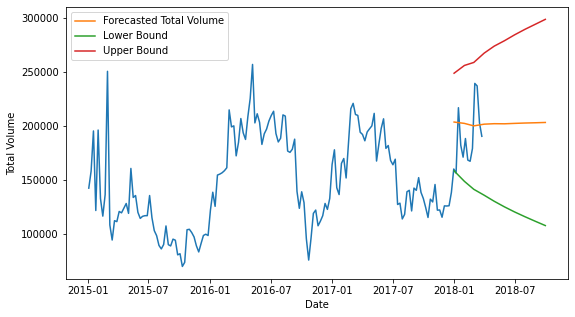

In [29]:
fig, ax = plt.subplots(figsize=(9,5))
sns.lineplot(x='Date', y='Total Volume', data=df_avocado_used, ax=ax)
# sns.lineplot(x='Month', y='Sales_fitted', data=df_shampoo, ax=ax, label='Fitted Sales')
sns.lineplot(x='Date', y='Total Volume', data=df_avocado_forecast, ax=ax, label='Forecasted Total Volume')
sns.lineplot(x='Date', y='Lower Bound CI', data=df_avocado_forecast, ax=ax, label='Lower Bound')
sns.lineplot(x='Date', y='Upper Bound CI', data=df_avocado_forecast, ax=ax, label='Upper Bound')
plt.legend();